In [17]:
# Import libraries
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,12) # Adjust the configuration of the plot we will create

# Read in the data
df = pd.read_csv(r'D:\Programming languages\Data Science\Projects\Project 3 Python\Dataset\movies.csv')

# Let's Look at the data
df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [2]:
# Let's see if there is any missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [3]:
# Data types for the columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [4]:
# Checking the number of missing values per columns
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [5]:
# Filling null valsues with the mean of the column
df.fillna(value = df['budget'].mean())

df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [6]:
df = df.fillna(value = df['budget'].mean())

In [7]:
df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [8]:
#change data type of columns

df['budget'] =  df['budget'].astype('int64')
df['gross']  =  df['gross'].astype('int64')

In [9]:
# Sorting the data by the highest Gross value

df.sort_values(by= ['gross'], inplace = False, ascending = False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000.0,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0
6646,Furious 7,PG-13,Action,2015,"April 3, 2015 (United States)",7.1,370000.0,James Wan,Chris Morgan,Vin Diesel,United States,190000000,1515341399,Universal Pictures,137.0
7494,Frozen II,PG,Animation,2019,"November 22, 2019 (United States)",6.8,148000.0,Chris Buck,Jennifer Lee,Kristen Bell,United States,150000000,1450026933,Walt Disney Animation Studios,103.0


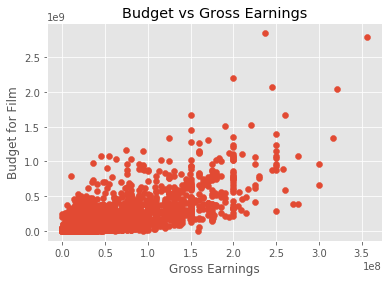

In [10]:
# Build Scatter Plot for Budget vs gross

plt.scatter(x= df['budget'], y = df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()


C:\Users\Mazin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


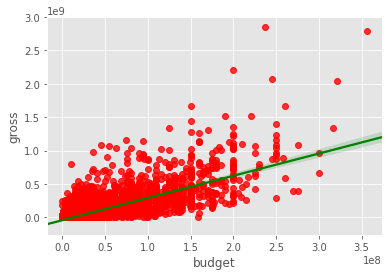

In [11]:
# Plot the Budget vs Gross using regression
sns.regplot(x= 'budget', y='gross', data = df, scatter_kws = {"color":"red"}, line_kws ={"color":"green"})

In [12]:
# Looking to Correlation
df.corr()      


,year,score,votes,budget,gross,runtime
year,1.000000,0.034758,0.084326,0.265578,0.257613,0.025802
score,0.034758,1.000000,0.974006,-0.019868,-0.005055,-0.000452
votes,0.084326,0.974006,1.000000,0.076016,0.138100,-0.001345
budget,0.265578,-0.019868,0.076016,1.000000,0.712529,-0.005058
gross,0.257613,-0.005055,0.138100,0.712529,1.000000,-0.005745
runtime,0.025802,-0.000452,-0.001345,-0.005058,-0.005745,1.000000


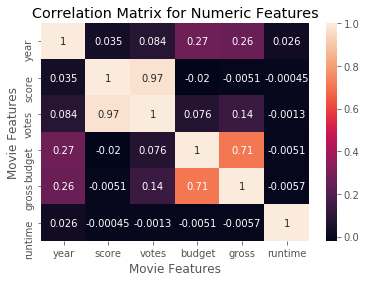

In [14]:
# Visualizing the correlation between columns
correlation_matrix = df.corr(method = 'pearson') #types: pearson,kendall,spearman
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [15]:
# For Company column
#changing all Non_numeric colums into numerical values.
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
# checking our new numerized dataset
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,7,6,1980,1706,8.400000e+00,9.270000e+05,2589,4015,1048,55,19000000,46998772,2320,1.460000e+02
1,5573,7,1,1980,1493,5.800000e+00,6.500000e+04,2269,1633,328,56,4500000,58853106,732,1.040000e+02
2,5142,5,0,1980,1772,8.700000e+00,1.200000e+06,1111,2568,1746,56,18000000,538375067,1541,1.240000e+02
3,286,5,4,1980,1493,7.700000e+00,2.210000e+05,1301,2001,2247,56,3500000,83453539,1813,8.800000e+01
4,1027,7,4,1980,1544,7.300000e+00,1.080000e+05,1054,522,411,56,6000000,39846344,1778,9.800000e+01
5,2109,7,10,1980,2503,6.400000e+00,1.230000e+05,2528,4363,242,56,550000,39754601,1813,9.500000e+01
6,5574,7,0,1980,1772,7.900000e+00,1.880000e+05,1412,839,1278,56,27000000,115229890,2282,1.330000e+02
7,4436,7,3,1980,700,8.200000e+00,3.300000e+05,1829,1770,2241,56,18000000,23402427,632,1.290000e+02
8,5281,5,0,1980,1754,6.800000e+00,1.010000e+05,2306,1980,878,56,54000000,108185706,884,1.270000e+02
9,6213,7,3,1980,2287,7.000000e+00,1.000000e+04,2864,424,590,56,10000000,15795189,2273,1.000000e+02


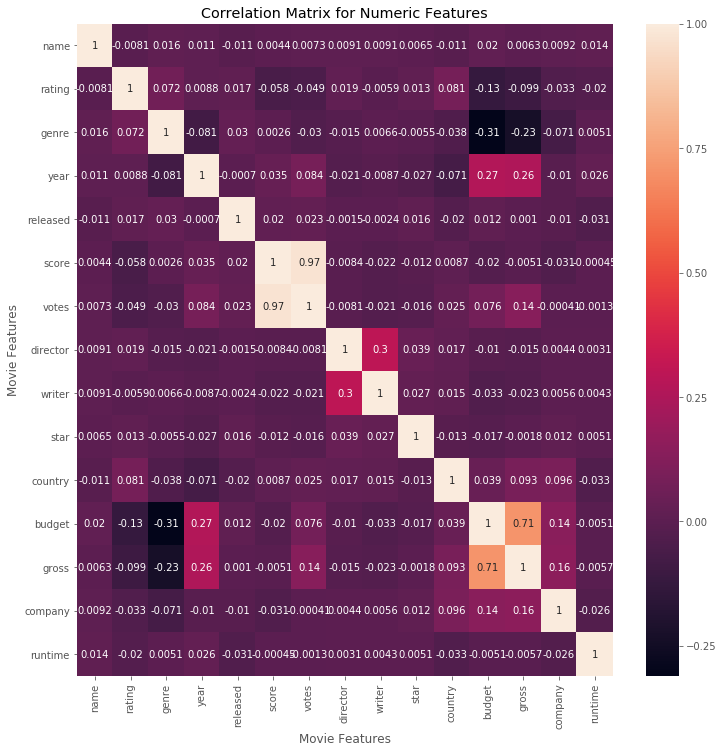

In [18]:
# Running the correlation matrix for the new numerized dataset
correlation_matrix = df_numerized.corr(method = 'pearson') #types: pearson,kendall,spearman
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [19]:
# Looking to Correlation 
df_numerized.corr()     

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.004443,0.007291,0.009079,0.009081,0.006472,-0.010737,0.020368,0.006304,0.009211,0.013912
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,-0.057897,-0.048888,0.019483,-0.005921,0.013405,0.081244,-0.126046,-0.098535,-0.032943,-0.019996
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.002630,-0.030347,-0.015258,0.006567,-0.005477,-0.037615,-0.310566,-0.232632,-0.071067,0.005105
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.034758,0.084326,-0.020795,-0.008656,-0.027242,-0.070938,0.265578,0.257613,-0.010431,0.025802
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.020144,0.023266,-0.001478,-0.002404,0.015777,-0.020427,0.012263,0.001025,-0.010474,-0.030539
score,0.004443,-0.057897,0.002630,0.034758,0.020144,1.000000,0.974006,-0.008424,-0.022036,-0.012131,0.008687,-0.019868,-0.005055,-0.031384,-0.000452
votes,0.007291,-0.048888,-0.030347,0.084326,0.023266,0.974006,1.000000,-0.008146,-0.021261,-0.016182,0.025138,0.076016,0.138100,-0.000411,-0.001345
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,-0.008424,-0.008146,1.000000,0.299067,0.039234,0.017490,-0.010364,-0.014635,0.004404,0.003139
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,-0.022036,-0.021261,0.299067,1.000000,0.027245,0.015343,-0.033216,-0.023109,0.005646,0.004253
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.012131,-0.016182,0.039234,0.027245,1.000000,-0.012998,-0.016628,-0.001834,0.012442,0.005090


In [20]:
correl_matrix = df_numerized.corr()
correl_pairs = correl_matrix.unstack()
correl_pairs

name     name        1.000000
         rating     -0.008069
         genre       0.016355
         year        0.011453
         released   -0.011311
         score       0.004443
         votes       0.007291
         director    0.009079
         writer      0.009081
         star        0.006472
         country    -0.010737
         budget      0.020368
         gross       0.006304
         company     0.009211
         runtime     0.013912
rating   name       -0.008069
         rating      1.000000
         genre       0.072423
         year        0.008779
         released    0.016613
         score      -0.057897
         votes      -0.048888
         director    0.019483
         writer     -0.005921
         star        0.013405
         country     0.081244
         budget     -0.126046
         gross      -0.098535
         company    -0.032943
         runtime    -0.019996
                       ...   
company  name        0.009211
         rating     -0.032943
         g

In [21]:
# Sorting for the highest correlation
sorted_pairs = correl_pairs.sort_values()
high_correl = sorted_pairs[(sorted_pairs) > 0.5]
high_correl

budget    gross       0.712529
gross     budget      0.712529
votes     score       0.974006
score     votes       0.974006
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64